In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Weather Forecasting.csv to Weather Forecasting.csv


# **Data Preprocessing**

In [3]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(df.head(10))

   wind_dir  app_temp    pres  temp  clouds  wind_spd       description  \
0       233     102.9  1001.5  88.3      54      10.4        Few clouds   
1       241     102.6  1000.5  87.6      53       8.1        Few clouds   
2       236     101.5  1000.5  86.9      57       8.1  Scattered clouds   
3       237     104.1  1002.5  88.5      57       6.9  Scattered clouds   
4       236     109.2  1002.0  93.4      58       9.2  Scattered clouds   
5       230     113.6  1000.5  96.1      53      11.5        Few clouds   
6       230     111.3  1000.0  93.6      48      12.7        Few clouds   
7       232     105.0  1001.0  89.2      55       9.2        Few clouds   
8       233     104.2  1002.0  88.3      52       9.2        Few clouds   
9       245     102.6  1001.0  87.4      50       6.9        Few clouds   

      city  
0  Karachi  
1  Karachi  
2  Karachi  
3  Karachi  
4  Karachi  
5  Karachi  
6  Karachi  
7  Karachi  
8  Karachi  
9  Karachi  


In [4]:
print(df['description'].unique())

['Few clouds' 'Scattered clouds' 'Clear Sky' 'Overcast clouds'
 'Light shower rain' 'Broken clouds' 'Thunderstorm with rain']


In [5]:
d = {'Few clouds': 0, 'Scattered clouds': 1, 'Clear Sky': 2, 'Overcast clouds': 3, 'Light shower rain': 4, 'Broken clouds': 5, 'Thunderstorm with rain': 6}
df['description'] = df['description'].map(d)

print(df)

     wind_dir  app_temp    pres   temp  clouds  wind_spd  description  \
0         233     102.9  1001.5   88.3      54      10.4            0   
1         241     102.6  1000.5   87.6      53       8.1            0   
2         236     101.5  1000.5   86.9      57       8.1            1   
3         237     104.1  1002.5   88.5      57       6.9            1   
4         236     109.2  1002.0   93.4      58       9.2            1   
..        ...       ...     ...    ...     ...       ...          ...   
715        76      94.7   968.0   88.7      82       6.9            3   
716        92     103.4   969.0  100.3       0      11.2            0   
717       194     112.1   966.0  113.7       0      14.3            2   
718       210     111.7   964.5  112.2      53       6.6            5   
719       285     103.7   965.0  103.4      96       5.6            3   

                city  
0            Karachi  
1            Karachi  
2            Karachi  
3            Karachi  
4       

In [6]:
df = df.drop(['city'], axis=1)
print(df.head(10))

   wind_dir  app_temp    pres  temp  clouds  wind_spd  description
0       233     102.9  1001.5  88.3      54      10.4            0
1       241     102.6  1000.5  87.6      53       8.1            0
2       236     101.5  1000.5  86.9      57       8.1            1
3       237     104.1  1002.5  88.5      57       6.9            1
4       236     109.2  1002.0  93.4      58       9.2            1
5       230     113.6  1000.5  96.1      53      11.5            0
6       230     111.3  1000.0  93.6      48      12.7            0
7       232     105.0  1001.0  89.2      55       9.2            0
8       233     104.2  1002.0  88.3      52       9.2            0
9       245     102.6  1001.0  87.4      50       6.9            0


In [7]:
print(df.columns.tolist())

['wind_dir', 'app_temp', 'pres', 'temp', 'clouds', 'wind_spd', 'description']


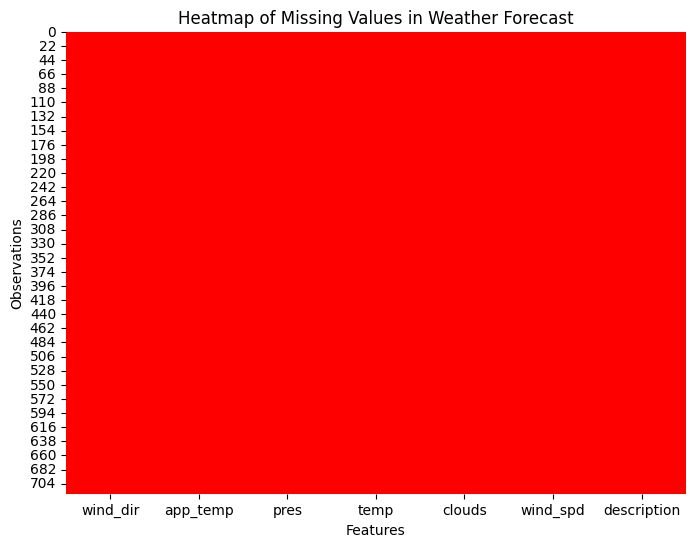

In [8]:
df1 = pd.DataFrame(df)
missing_mask = df1.isnull()

plt.figure(figsize=(8, 6))

sns.heatmap(missing_mask, cmap='viridis', cbar=False, linewidths=0.5, linecolor='red')

plt.title('Heatmap of Missing Values in Weather Forecast')
plt.xlabel('Features')
plt.ylabel('Observations')

plt.show()

In [9]:
print(missing_mask)

     wind_dir  app_temp   pres   temp  clouds  wind_spd  description
0       False     False  False  False   False     False        False
1       False     False  False  False   False     False        False
2       False     False  False  False   False     False        False
3       False     False  False  False   False     False        False
4       False     False  False  False   False     False        False
..        ...       ...    ...    ...     ...       ...          ...
715     False     False  False  False   False     False        False
716     False     False  False  False   False     False        False
717     False     False  False  False   False     False        False
718     False     False  False  False   False     False        False
719     False     False  False  False   False     False        False

[720 rows x 7 columns]


In [10]:
print(df1.isnull().sum())

wind_dir       0
app_temp       0
pres           0
temp           0
clouds         0
wind_spd       0
description    0
dtype: int64


In [11]:
df1.count()

,0
wind_dir,720
app_temp,720
pres,720
temp,720
clouds,720
wind_spd,720
description,720


In [12]:
df1.shape[0]

720

In [13]:
dataset_dropped_1 = df.drop(['description'], axis=1)

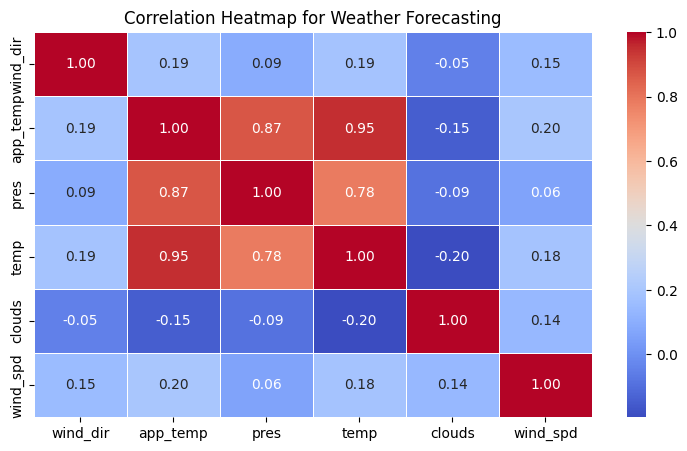

In [14]:
corr = dataset_dropped_1.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap for Weather Forecasting')
plt.show()

In [15]:
lower_quantile = dataset_dropped_1.quantile(0.01)
upper_quantile = dataset_dropped_1.quantile(0.99)

print(f"Lower Threshold (1st Percentile)\n: {lower_quantile}")
print(f"Upper Threshold (99th Percentile)\n: {upper_quantile}")

# Detecting outliers
outliers = dataset_dropped_1[(dataset_dropped_1 < lower_quantile) | (dataset_dropped_1 > upper_quantile)]
print("\n\n Outliers:")
print(outliers)


Lower Threshold (1st Percentile)
: wind_dir      8.000
app_temp     45.900
pres        655.095
temp         45.900
clouds        0.000
wind_spd      0.619
Name: 0.01, dtype: float64
Upper Threshold (99th Percentile)
: wind_dir     352.810
app_temp     120.881
pres        1002.000
temp         116.181
clouds        97.620
wind_spd      18.805
Name: 0.99, dtype: float64


 Outliers:
     wind_dir  app_temp    pres  temp  clouds  wind_spd
0         NaN       NaN     NaN   NaN     NaN       NaN
1         NaN       NaN     NaN   NaN     NaN       NaN
2         NaN       NaN     NaN   NaN     NaN       NaN
3         NaN       NaN  1002.5   NaN     NaN       NaN
4         NaN       NaN     NaN   NaN     NaN       NaN
..        ...       ...     ...   ...     ...       ...
715       NaN       NaN     NaN   NaN     NaN       NaN
716       NaN       NaN     NaN   NaN     NaN       NaN
717       NaN       NaN     NaN   NaN     NaN       NaN
718       NaN       NaN     NaN   NaN     NaN       NaN


In [16]:
print(outliers.describe())

         wind_dir    app_temp         pres        temp      clouds   wind_spd
count   15.000000   15.000000    15.000000   15.000000    8.000000  16.000000
mean   192.266667   85.346667   813.166667   82.946667   99.500000  11.550000
std    181.471551   40.906162   183.742023   37.399845    0.755929  11.777606
min      1.000000   39.900000   634.500000   42.600000   98.000000   0.200000
25%      6.000000   43.950000   654.500000   44.750000   99.000000   0.200000
50%    353.000000  120.900000   655.000000  116.200000  100.000000   9.750000
75%    356.000000  121.550000  1002.750000  116.700000  100.000000  21.525000
max    360.000000  124.400000  1003.000000  117.400000  100.000000  28.200000


In [17]:
# Calculate median for each column
median_values = dataset_dropped_1.median()

def replace_outliers_with_median(column):
    return np.where((column < lower_quantile[column.name]) | (column > upper_quantile[column.name]),
                    median_values[column.name],
                    column)

dataset_dropped_1 = dataset_dropped_1.apply(replace_outliers_with_median)

print("\nDataset with Outliers Replaced by Median:")
print(dataset_dropped_1)


Dataset with Outliers Replaced by Median:
     wind_dir  app_temp    pres   temp  clouds  wind_spd
0       233.0     102.9  1001.5   88.3    54.0      10.4
1       241.0     102.6  1000.5   87.6    53.0       8.1
2       236.0     101.5  1000.5   86.9    57.0       8.1
3       237.0     104.1   971.5   88.5    57.0       6.9
4       236.0     109.2  1002.0   93.4    58.0       9.2
..        ...       ...     ...    ...     ...       ...
715      76.0      94.7   968.0   88.7    82.0       6.9
716      92.0     103.4   969.0  100.3     0.0      11.2
717     194.0     112.1   966.0  113.7     0.0      14.3
718     210.0     111.7   964.5  112.2    53.0       6.6
719     285.0     103.7   965.0  103.4    96.0       5.6

[720 rows x 6 columns]


In [18]:
print(dataset_dropped_1.describe())

         wind_dir    app_temp         pres        temp      clouds    wind_spd
count  720.000000  720.000000   720.000000  720.000000  720.000000  720.000000
mean   199.723611   98.178333   938.768750   93.639861   11.934722    6.100417
std     83.723201   16.024329    85.453879   14.403375   21.445468    3.424730
min      8.000000   45.900000   655.500000   45.900000    0.000000    0.700000
25%    172.000000   93.275000   962.500000   87.950000    0.000000    3.400000
50%    220.000000  101.500000   971.500000   94.500000    0.000000    5.700000
75%    249.000000  109.375000   977.000000  104.100000   16.000000    8.100000
max    352.000000  120.800000  1002.000000  116.100000   96.000000   18.400000


In [19]:
outliers1 = dataset_dropped_1[(dataset_dropped_1 < lower_quantile) | (dataset_dropped_1 > upper_quantile)]
print("\n\n Outliers:")
print(outliers1)



 Outliers:
     wind_dir  app_temp  pres  temp  clouds  wind_spd
0         NaN       NaN   NaN   NaN     NaN       NaN
1         NaN       NaN   NaN   NaN     NaN       NaN
2         NaN       NaN   NaN   NaN     NaN       NaN
3         NaN       NaN   NaN   NaN     NaN       NaN
4         NaN       NaN   NaN   NaN     NaN       NaN
..        ...       ...   ...   ...     ...       ...
715       NaN       NaN   NaN   NaN     NaN       NaN
716       NaN       NaN   NaN   NaN     NaN       NaN
717       NaN       NaN   NaN   NaN     NaN       NaN
718       NaN       NaN   NaN   NaN     NaN       NaN
719       NaN       NaN   NaN   NaN     NaN       NaN

[720 rows x 6 columns]


In [20]:
print(outliers1.describe())

       wind_dir  app_temp  pres  temp  clouds  wind_spd
count       0.0       0.0   0.0   0.0     0.0       0.0
mean        NaN       NaN   NaN   NaN     NaN       NaN
std         NaN       NaN   NaN   NaN     NaN       NaN
min         NaN       NaN   NaN   NaN     NaN       NaN
25%         NaN       NaN   NaN   NaN     NaN       NaN
50%         NaN       NaN   NaN   NaN     NaN       NaN
75%         NaN       NaN   NaN   NaN     NaN       NaN
max         NaN       NaN   NaN   NaN     NaN       NaN


In [21]:
df['wind_dir'] = dataset_dropped_1['wind_dir']
df['app_temp'] = dataset_dropped_1['app_temp']
df['pres'] = dataset_dropped_1['pres']
df['temp'] = dataset_dropped_1['temp']
df['clouds'] = dataset_dropped_1['clouds']
df['wind_spd'] = dataset_dropped_1['wind_spd']

In [22]:
print(df.head(10))

   wind_dir  app_temp    pres  temp  clouds  wind_spd  description
0     233.0     102.9  1001.5  88.3    54.0      10.4            0
1     241.0     102.6  1000.5  87.6    53.0       8.1            0
2     236.0     101.5  1000.5  86.9    57.0       8.1            1
3     237.0     104.1   971.5  88.5    57.0       6.9            1
4     236.0     109.2  1002.0  93.4    58.0       9.2            1
5     230.0     113.6  1000.5  96.1    53.0      11.5            0
6     230.0     111.3  1000.0  93.6    48.0      12.7            0
7     232.0     105.0  1001.0  89.2    55.0       9.2            0
8     233.0     104.2  1002.0  88.3    52.0       9.2            0
9     245.0     102.6  1001.0  87.4    50.0       6.9            0


# **Data Visualization**

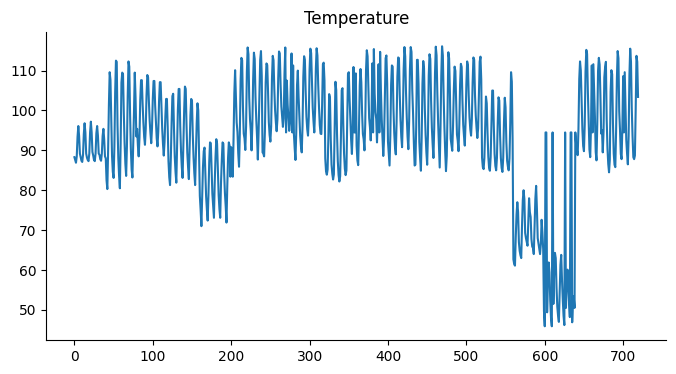

In [23]:
df['temp'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

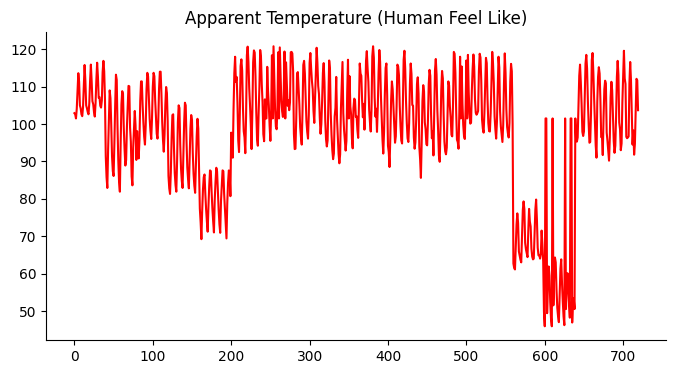

In [24]:
df['app_temp'].plot(kind='line', figsize=(8, 4), color='red', title='Apparent Temperature (Human Feel Like)')
plt.gca().spines[['top', 'right']].set_visible(False)

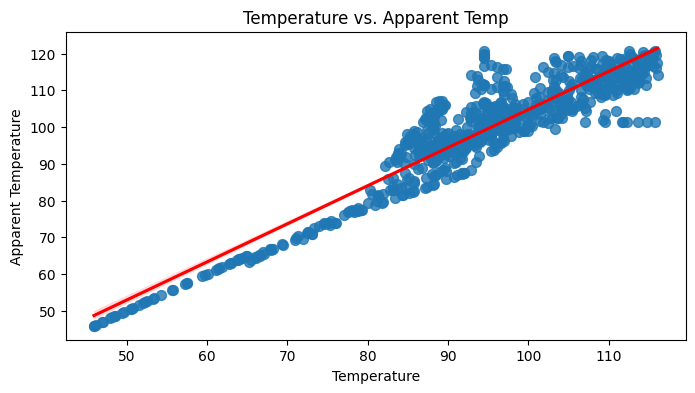

In [25]:
plt.figure(figsize=(8, 4))
sns.regplot(x='temp', y='app_temp', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Temperature vs. Apparent Temp')
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')
plt.show()

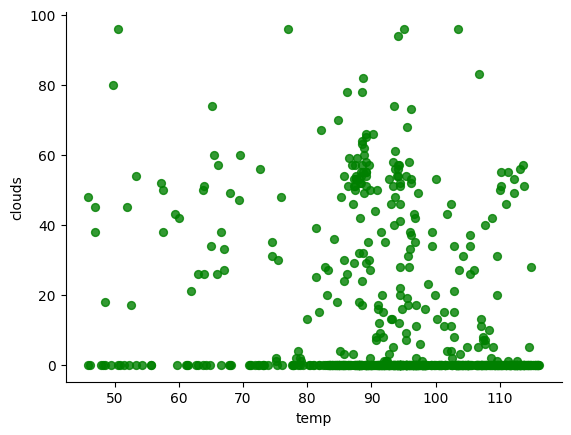

In [26]:
df.plot(kind='scatter', x='temp', y='clouds', color='green', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-27-1520956886>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='temp', y='description', inner='box', palette='Dark2')


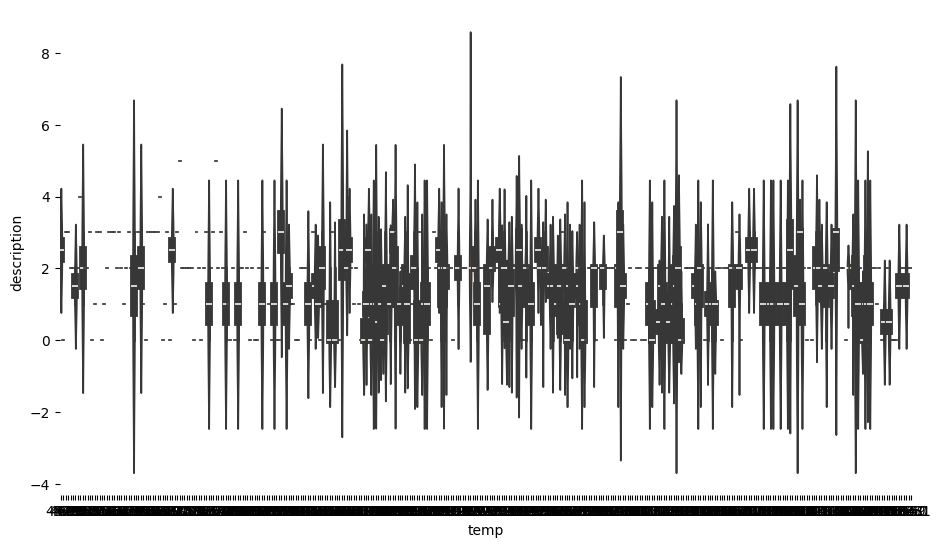

In [27]:
figsize = (11, 0.9 * len(df['description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='temp', y='description', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

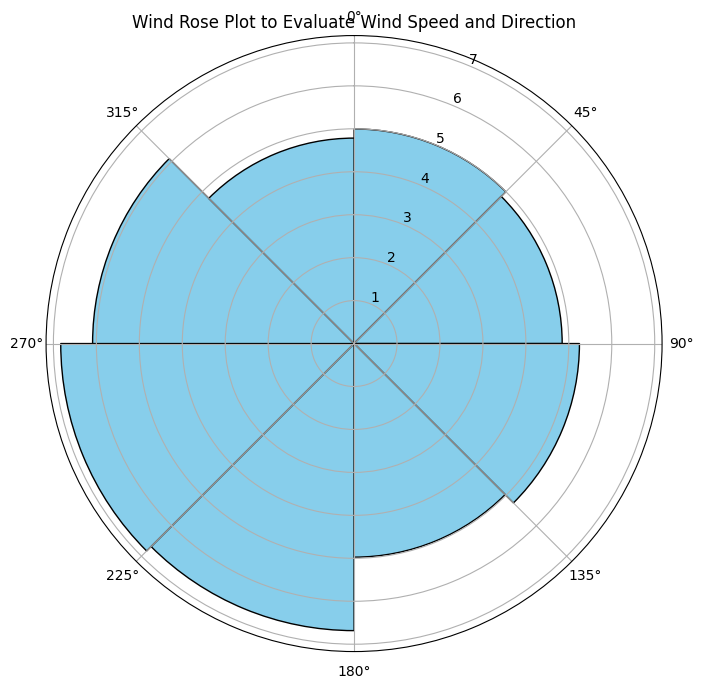

In [28]:
num_bins = 8
bin_edges = np.linspace(0, 360, num_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

wind_speed_sum = np.zeros(num_bins)
wind_speed_counts = np.zeros(num_bins)

for i in range(num_bins):
    in_bin = (df['wind_dir'] >= bin_edges[i]) & (df['wind_dir'] < bin_edges[i + 1])
    wind_speed_sum[i] = df.loc[in_bin, 'wind_spd'].sum()
    wind_speed_counts[i] = in_bin.sum()

average_wind_speed = wind_speed_sum / wind_speed_counts

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
bars = ax.bar(
    np.deg2rad(bin_centers),
    average_wind_speed,
    width=np.deg2rad(360 / num_bins),
    color='skyblue',
    edgecolor='black'
)

ax.set_title('Wind Rose Plot to Evaluate Wind Speed and Direction')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.show()

# WeatherBit API for Model Input Variables

In [29]:
import requests, json

lat = 24.8607
lon = 67.0011
api_key = "57cac8d74936472e8650390b011cc6aa"

url = f"http://api.weatherbit.io/v2.0/current?lat={lat}&lon={lon}&key={api_key}"
print(url)

req = requests.get(url)
data = req.json()

http://api.weatherbit.io/v2.0/current?lat=24.8607&lon=67.0011&key=57cac8d74936472e8650390b011cc6aa


In [30]:
description_encoded = {
    'Clear': 1,
    'Partly Cloudy': 2,
    'Overcast': 3,
    'Fog': 4,
    'Haze': 5,
    'Smoke': 6,
    'Drizzle': 7,
    'Rain': 8,
    'Snow': 9,
    'Hail': 10,
    'Thunderstorm': 11,
    'Tornado': 12,
    'Mist': 13,
    'Dust': 14,
    'Clear sky': 15
}

In [31]:
# Extract values
apparent_temp = ((data['data'][0]['app_temp']) * 9/5) + 32
pressure = data['data'][0]['pres']
clouds = (data['data'][0]['clouds']) / 100
wind_speed = data['data'][0]['wind_spd']
wind_dir = data['data'][0]['wind_dir']
description = description_encoded[data['data'][0]['weather']['description']]

# Print the extracted values
print(f"Apparent Temp: {apparent_temp} F")
print(f"Pressure: {pressure} hPa")
print(f"Clouds: {clouds}")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Wind Direction: {wind_dir} °")
print(f"Description: {description}")

Apparent Temp: 98.24 F
Pressure: 994.7 hPa
Clouds: 1.0
Wind Speed: 9.3 m/s
Wind Direction: 250 °
Description: 5


# **Multiple Regression Model**

In [32]:
X1 = df[['app_temp', 'pres', 'clouds', 'wind_spd', 'wind_dir','description']]
y1 = df['temp']

In [33]:
from sklearn import linear_model

In [34]:
regr1 = linear_model.LinearRegression()
regr1.fit(X1, y1)

LinearRegression()

In [35]:
predicted11 = regr1.predict([[apparent_temp, pressure, clouds, wind_speed, wind_dir, description]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
far_to_cel11 = np.round((predicted11 - 32) * 5/9)
print("Temp:",far_to_cel11[0],'°C')

Temp: 35.0 °C


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
y_pred1 = regr1.predict(X1)

**Evaluating Accuracy Score for Multiple Regression Model**

In [39]:
acc1 = r2_score(y1, y_pred1)
print("Accuracy Score:", acc1)

Accuracy Score: 0.8802066273257763


**Evaluating Mean Absolute Error for Multiple Regression Model**

In [71]:
mae = mean_absolute_error(y1, y_pred1)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 3.8560162076380893


Evaluating Mean Square Error for Multiple Regression Model

In [70]:
mse = mean_squared_error(y1, y_pred1)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 24.817480874700898


**Prediction for next 7 days**

In [40]:
future_features1 = np.array([
    [105.0, 1002.0, 60, 10.0, 250, 1],  # Day 1
    [106.5, 1003.0, 62, 11.0, 255, 1],  # Day 2
    [107.0, 1004.0, 65, 12.0, 260, 1],  # Day 3
    [108.5, 1005.0, 64, 9.5, 250, 1],   # Day 4
    [109.0, 1006.0, 66, 11.5, 265, 1],  # Day 5
    [110.0, 1007.0, 67, 12.5, 270, 1],  # Day 6
    [111.0, 1008.0, 68, 13.5, 275, 1]   # Day 7
])

In [41]:
predicted_temps12 = regr1.predict(future_features1)

far_to_cel12 = np.round((predicted_temps12 - 32) * 5/9)

for i, temp in enumerate(far_to_cel12):
    print(f"Predicted temperature for Day {i + 1}: {temp} °C")

Predicted temperature for Day 1: 35.0 °C
Predicted temperature for Day 2: 36.0 °C
Predicted temperature for Day 3: 36.0 °C
Predicted temperature for Day 4: 37.0 °C
Predicted temperature for Day 5: 37.0 °C
Predicted temperature for Day 6: 38.0 °C
Predicted temperature for Day 7: 38.0 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Multivariate Regression Model**

In [42]:
X2 = df[['clouds', 'pres', 'wind_dir', 'wind_spd','description']]
y2 = df[['temp', 'app_temp']]

In [43]:
regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)

LinearRegression()

In [44]:
predicted21 = regr2.predict([[clouds, pressure, wind_dir, wind_speed, description]])
far_to_cel21 = np.round((predicted21 - 32) * 5/9)
print("Predicted values in °C:", far_to_cel21)

Predicted values in °C: [[42. 45.]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Evaluating Accuracy Score for Multivariate Regression Model**

In [45]:
for i, target_name in enumerate(y2.columns):
    print(f"Performance for {target_name}:")
    print("Accuracy Score:", r2_score(y2[target_name], regr2.predict(X2)[:, i]))

Performance for temp:
Accuracy Score: 0.5680361324643648
Performance for app_temp:
Accuracy Score: 0.6897714518595669


**Evaluating Mean Absolute Error for Multivariate Regression Model**

In [72]:
for i, target_name in enumerate(y2.columns):
    print(f"Performance for {target_name}:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y2[target_name], regr2.predict(X2)[:, i]))

Performance for temp:
Mean Absolute Error (MAE): 7.44407140408429
Performance for app_temp:
Mean Absolute Error (MAE): 6.656710499717674


**Evaluating Mean Squared Error for Multivariate Regression Model**

In [73]:
for i, target_name in enumerate(y2.columns):
    print(f"Performance for {target_name}:")
    print("Mean Squared Error (MSE):", mean_squared_error(y2[target_name], regr2.predict(X2)[:, i]))

Performance for temp:
Mean Squared Error (MSE): 89.48955006284889
Performance for app_temp:
Mean Squared Error (MSE): 79.5495721298265


**Prediction for next 7 days**

In [46]:
future_features2 = np.array([
    [60, 1002.0, 240, 11.0, 1],  # Day 1
    [62, 1003.0, 245, 12.0, 1],  # Day 2
    [65, 1004.0, 250, 12.5, 1],  # Day 3
    [64, 1005.0, 255, 11.5, 1],  # Day 4
    [66, 1006.0, 260, 13.0, 1],  # Day 5
    [68, 1007.0, 265, 13.5, 1],  # Day 6
    [70, 1008.0, 270, 14.0, 1]   # Day 7
])

In [47]:
predicted_temps22 = regr2.predict(future_features2)
far_to_cel22 = np.round((predicted_temps22 - 32) * 5/9)

for i, target_name in enumerate(y2.columns):
    print(f"Predicted values for {target_name} over the next 7 days:")
    for j in range(len(future_features2)):
        print(f"Day {j + 1}: {round(far_to_cel22[j, i])} °C")

Predicted values for temp over the next 7 days:
Day 1: 37 °C
Day 2: 37 °C
Day 3: 37 °C
Day 4: 37 °C
Day 5: 38 °C
Day 6: 38 °C
Day 7: 38 °C
Predicted values for app_temp over the next 7 days:
Day 1: 42 °C
Day 2: 42 °C
Day 3: 43 °C
Day 4: 42 °C
Day 5: 43 °C
Day 6: 43 °C
Day 7: 44 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Random Forest Model**

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [49]:
X3 = df[['clouds', 'pres', 'wind_dir', 'wind_spd', 'description']]
y3 = df[['temp', 'app_temp']]

In [50]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
multi_target_forest = MultiOutputRegressor(forest)
multi_target_forest.fit(X3, y3)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [51]:
y_pred3 = multi_target_forest.predict(X3)

In [52]:
predicted31 = multi_target_forest.predict([[clouds, pressure, wind_dir, wind_speed, description]])
far_to_cel31 = np.round((predicted31 - 32) * 5/9)
print("Predicted values for new data:", far_to_cel31,"°C")

Predicted values for new data: [[35. 42.]] °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Evaluating Accuracy Score for Random Forest Regression Model**

In [53]:
for i, target_name in enumerate(y3.columns):
    print(f"Performance for {target_name}:")
    print("Accuracy Score:", r2_score(y3[target_name], y_pred3[:, i]))
    print()

Performance for temp:
Accuracy Score: 0.9558844316429222

Performance for app_temp:
Accuracy Score: 0.9632659811107518



**Evaluating Mean Absolute Error for Random Forest Regression Model**

In [74]:
for i, target_name in enumerate(y3.columns):
    print(f"Performance for {target_name}:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y3[target_name], y_pred3[:, i]))
    print()

Performance for temp:
Mean Absolute Error (MAE): 2.1373208333333342

Performance for app_temp:
Mean Absolute Error (MAE): 2.138462499999998



**Evaluating Mean Squared Error for Random Forest Regression Model**

In [75]:
for i, target_name in enumerate(y3.columns):
    print(f"Performance for {target_name}:")
    print("Mean Squared Error (MAE):", mean_squared_error(y3[target_name], y_pred3[:, i]))
    print()

Performance for temp:
Mean Squared Error (MAE): 9.1393809986111

Performance for app_temp:
Mean Squared Error (MAE): 9.419428040277772



**Prediction for next 7 days**

In [54]:
future_features3 = np.array([
    [55, 1002.3, 240, 12.1,2],  # Day 1
    [60, 1003.0, 250, 13.5,2],  # Day 2
    [65, 1004.1, 260, 14.2,2],  # Day 3
    [70, 1005.2, 270, 15.0,2],  # Day 4
    [75, 1006.0, 280, 15.8,2],  # Day 5
    [80, 1007.5, 290, 16.6,2],  # Day 6
    [85, 1008.0, 300, 17.4,2]   # Day 7
])

In [55]:
predicted_7_days_RF = multi_target_forest.predict(future_features3)
far_to_cel32 = np.round((predicted_7_days_RF - 32) * 5/9)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [56]:
for i, target_name in enumerate(y3.columns):
    print(f"Predicted values for {target_name} over the next 7 days in °C:")
    print(far_to_cel32[:, i])
    print()

Predicted values for temp over the next 7 days in °C:
[35. 35. 35. 34. 35. 35. 34.]

Predicted values for app_temp over the next 7 days in °C:
[44. 45. 43. 43. 43. 43. 43.]



# Hence, The Random Forest for Regression Task is more accurate due to its most accurate prediction and high accuracy score cmparitively.

# **Random Forest Model for Regression and Classification Tasks**
# Just for Testing Purposes. Not a part of the project.

In [57]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [58]:
X = df[['clouds', 'pres', 'wind_dir', 'wind_spd']]

In [59]:
y_float = df[['temp', 'app_temp']]  # Regression targets
y_class = df['description'].astype('category')  # Classification target

In [60]:
X_train, X_test, y_float_train, y_float_test, y_class_train, y_class_test = train_test_split(
    X, y_float, y_class, test_size=0.2, random_state=42
)

In [61]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_float_train)

RandomForestRegressor(random_state=42)

In [62]:
forest_class = RandomForestClassifier(n_estimators=100, random_state=42)
forest_class.fit(X_train, y_class_train)

RandomForestClassifier(random_state=42)

In [63]:
y_float_pred = forest_reg.predict(X_test)
y_class_pred = forest_class.predict(X_test)

In [64]:
# Performance evaluation for regression targets
for i, target_name in enumerate(y_float.columns):
    print(f"Performance for {target_name}:")
    print("Accuracy Score:", r2_score(y_float_test[target_name], y_float_pred[:, i]))
    print()

Performance for temp:
Accuracy Score: 0.5652502752245596

Performance for app_temp:
Accuracy Score: 0.6504505024681924



In [65]:
# Performance evaluation for classification target
print("Classification Performance:")
print("Accuracy Score:", accuracy_score(y_class_test, y_class_pred))

Classification Performance:
Accuracy Score: 0.6805555555555556


In [66]:
new_data = [[clouds, pressure, wind_dir, wind_speed]]
predicted_float = forest_reg.predict(new_data)
predicted_class = forest_class.predict(new_data)

print("Predicted values for new data (temp, app_temp):", np.round((predicted_float - 32) * 5/9))
print("Predicted class for new data (description):", predicted_class)

Predicted values for new data (temp, app_temp): [[34. 41.]]
Predicted class for new data (description): [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
future_features = np.array([
    [55, 1002.3, 240, 12.1],  # Day 1
    [60, 1003.0, 250, 13.5],  # Day 2
    [65, 1004.1, 260, 14.2],  # Day 3
    [70, 1005.2, 270, 15.0],  # Day 4
    [75, 1006.0, 280, 15.8],  # Day 5
    [80, 1007.5, 290, 16.6],  # Day 6
    [85, 1008.0, 300, 17.4]   # Day 7
])

In [68]:
predicted_floats_future = forest_reg.predict(future_features)
predicted_classes_future = forest_class.predict(future_features)

for i, target_name in enumerate(y_float.columns):
    print(f"Predicted values for {target_name} over the next 7 days:")
    print(predicted_floats_future[:, i])
    print()

print("Predicted classes for the next 7 days (description):")
print(predicted_classes_future)

Predicted values for temp over the next 7 days:
[95.405 95.218 95.357 95.296 95.239 95.404 95.404]

Predicted values for app_temp over the next 7 days:
[113.559 113.979 113.954 113.951 113.754 113.728 113.728]

Predicted classes for the next 7 days (description):
[0 1 1 1 1 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
